In [1]:
from sklearn.pipeline import Pipeline

#### SVC - support vector classifier. This acts as classifier

In [2]:
from sklearn.svm import SVC

#### PCA - acts as a transormer for minimizing features
* from 1000 features, it can find 100 features

In [3]:
from sklearn.decomposition import PCA

In [4]:
elements = [('reduce_dim',PCA()), ('clf',SVC())]

In [5]:
pipe = Pipeline(elements)

In [6]:
pipe

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
pipe.fit(iris.data, iris.target)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [9]:
pipe.score(iris.data, iris.target)

0.98666666666666669

In [10]:
pipe.predict(iris.data[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
trainX,testX, trainY, testY =  train_test_split(iris.data, iris.target)

In [17]:
pipe.fit(trainX, trainY)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [18]:
pipe.score(testX,testY)

0.94736842105263153

In [19]:
from sklearn.model_selection import cross_val_score

In [22]:
scores = cross_val_score(pipe, iris.data, iris.target, cv=5)

In [23]:
import numpy as np

In [24]:
np.mean(score)

0.98000000000000009

In [26]:
from sklearn.pipeline import make_pipeline

In [27]:
from sklearn import preprocessing

In [28]:
pipe = make_pipeline(preprocessing.StandardScaler(), SVC())

In [30]:
np.mean(cross_val_score(pipe, iris.data, iris.target))

0.95383986928104569

#### GridSearch for Hyper-parameter tuning

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [33]:
from sklearn import datasets

In [34]:
digits = datasets.load_digits()

In [37]:
digits.data.shape

(1797, 64)

In [38]:
import matplotlib.pyplot as plt

In [45]:
plt.imshow(digits.data[5].reshape((8,8)))

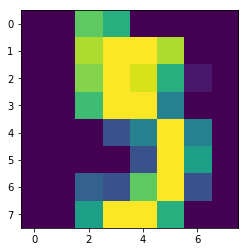

In [46]:
plt.show()

In [47]:
digits.target[5]

5

In [48]:
n_samples = len(digits.images)

In [53]:
X = digits.data

In [54]:
X.shape

(1797, 64)

In [55]:
y = digits.target

In [56]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.5, random_state=0)

In [68]:
tuned_parameters = [{'kernel': ['rbf','linear'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    
                    {'kernel': ['linear'], 
                     'C': [1, 10, 100, 1000]}]

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5)

In [71]:
clf.fit(trainX, trainY)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [64]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
clf.predict(testX)

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7, 8,
       4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7, 1, 0,
       7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9, 7, 6, 9,
       1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2, 9, 9,
       3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7, 3, 4, 8, 9, 7,
       9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 9, 9, 9, 5, 9, 9, 5, 7,
       5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6,
       7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 9, 6, 3,
       0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3,
       3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1,
       6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3,
       7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2,
       6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2,
       9, 0,

In [75]:
testY

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7, 8,
       4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7, 1, 0,
       7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9, 2, 6, 9,
       1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5, 1, 2, 9, 9,
       3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7, 3, 4, 8, 9, 7,
       9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9, 9, 5, 9, 9, 5, 7,
       5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6,
       7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6, 3, 8, 6, 7, 4, 5, 6, 3,
       0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3,
       3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1,
       6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3,
       7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2,
       6, 8, 8, 8, 4, 6, 7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2,
       9, 0,

In [67]:
clf.score(testX,testY)

0.99110122358175756

In [76]:
clf.cv_results_

{'mean_fit_time': array([ 0.12183847,  0.04160838,  0.07900019,  0.04090896,  0.09409556,
         0.04059858,  0.05514975,  0.04090414,  0.09209237,  0.04158688,
         0.04858685,  0.04121509,  0.09350715,  0.04123173,  0.04714541,
         0.0456284 ,  0.04002342,  0.0414175 ,  0.0394073 ,  0.04068279]),
 'mean_score_time': array([ 0.02035737,  0.01181302,  0.020789  ,  0.01186185,  0.01731696,
         0.01044512,  0.01371469,  0.01071248,  0.01789575,  0.01079159,
         0.01298523,  0.01073174,  0.01763115,  0.01098194,  0.01272969,
         0.01464043,  0.01099796,  0.01072917,  0.01080194,  0.01093106]),
 'mean_test_score': array([ 0.98552339,  0.97327394,  0.95768374,  0.97327394,  0.98663697,
         0.97327394,  0.98106904,  0.97327394,  0.98663697,  0.97327394,
         0.98106904,  0.97327394,  0.98663697,  0.97327394,  0.98106904,
         0.97327394,  0.97327394,  0.97327394,  0.97327394,  0.97327394]),
 'mean_train_score': array([ 0.99888733,  1.        ,  0.967696

In [77]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly